<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/NY_FeatureRanking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal:
Using Random Forest to estimate the gini index and feature importance for all features from NY dataset

Using Scikit-learn to compute PCA

## Mount Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler as ss
import itertools
from scipy import linalg
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [3]:
NY_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/NY_labeledData_Sep13.csv',low_memory=False)
print(NY_labeled_data.shape)

(9690, 19)


In [4]:
NY_labeled_data.dtypes

Date                      object
fips_x                     int64
County Name               object
retail and recreation    float64
grocery and pharmacy     float64
parks                    float64
transit stations         float64
workplaces               float64
residential              float64
driving                  float64
m50                      float64
m50_index                  int64
population_density       float64
mask_rule_active           int64
mask_wearing_percent     float64
New cases                  int64
rolling_avg_new_cases    float64
label                     object
growth_label              object
dtype: object

## Preprocessing data 

* drop na
* convert categorical code

In [5]:
NY_labeled_data['label_code'] = NY_labeled_data['label'].astype('category').cat.codes

NY_labeled_data.head(2)

,Date,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,growth_label,label_code
0,2020-03-01,36001,Albany County,10.0,13.0,19.0,4.0,7.0,-1.0,-4.87,2.616,54,584.364958,0,0.0,0,0.0,LessSpread,flat_growth,0
1,2020-03-01,36003,Allegany County,47.0,13.0,0.0,0.0,1.0,0.0,19.81,0.707,12,44.778541,0,0.0,0,0.0,LessSpread,flat_growth,0


In [13]:
NY_labeled_data = NY_labeled_data.dropna()

In [14]:
NY_labeled_data[pd.isna(NY_labeled_data['label'])]

,Date,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,growth_label,label_code


In [15]:
NY_labeled_data['label_code'].unique()

array([0, 2, 1], dtype=int8)

In [16]:
NY_labeled_data['growth_code'] = NY_labeled_data['growth_label'].astype('category').cat.codes
NY_labeled_data.head()

,Date,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,growth_label,label_code,growth_code
0,2020-03-01,36001,Albany County,10.0,13.0,19.0,4.0,7.0,-1.0,-4.87,2.616,54,584.364958,0,0.0,0,0.0,LessSpread,flat_growth,0,2
1,2020-03-01,36003,Allegany County,47.0,13.0,0.0,0.0,1.0,0.0,19.81,0.707,12,44.778541,0,0.0,0,0.0,LessSpread,flat_growth,0,2
2,2020-03-01,36123,Yates County,31.0,33.0,0.0,0.0,7.0,0.0,28.14,5.004,72,73.676584,0,0.0,0,0.0,LessSpread,flat_growth,0,2
3,2020-03-01,36119,Westchester County,8.0,-1.0,12.0,1.0,0.0,0.0,-4.34,3.903,59,2247.400697,0,0.0,0,0.0,LessSpread,flat_growth,0,2
4,2020-03-01,36031,Essex County,16.0,11.0,17.0,0.0,1.0,0.0,60.18,12.600,197,20.557565,0,0.0,0,0.0,LessSpread,flat_growth,0,2


In [17]:
NY_labeled_data['growth_code'].unique()

array([2, 1, 3, 4, 0], dtype=int8)

In [18]:
NY_labeled_data.dtypes

Date                      object
fips_x                     int64
County Name               object
retail and recreation    float64
grocery and pharmacy     float64
parks                    float64
transit stations         float64
workplaces               float64
residential              float64
driving                  float64
m50                      float64
m50_index                  int64
population_density       float64
mask_rule_active           int64
mask_wearing_percent     float64
New cases                  int64
rolling_avg_new_cases    float64
label                     object
growth_label              object
label_code                  int8
growth_code                 int8
dtype: object

In [61]:
feature_labels = ['retail and recreation','grocery and pharmacy','parks','transit stations','workplaces','residential','driving','m50','m50_index',
               'population_density','mask_rule_active']

target_column = ['label_code']

X = NY_labeled_data[feature_labels]
y = NY_labeled_data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Train Random Forest classifier

In [21]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


('retail and recreation', 0.08533237907689088)
('grocery and pharmacy', 0.07432744335920005)
('parks', 0.08480298060160986)
('transit stations', 0.08796250851161055)
('workplaces', 0.09479738178990016)
('residential', 0.06285539885421815)
('driving', 0.13091202907639612)
('m50', 0.09735863140413215)
('m50_index', 0.07388504135209598)
('population_density', 0.16029826261037747)
('mask_rule_active', 0.04746794336356852)


In [22]:

#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


('retail and recreation', 0.06739541253738059)
('grocery and pharmacy', 0.04860335482970266)
('parks', 0.051090256823234766)
('transit stations', 0.08608358869920833)
('workplaces', 0.06382473110426025)
('residential', 0.054494080882956875)
('driving', 0.16064985960050648)
('m50', 0.06833588120137825)
('m50_index', 0.058118905331399844)
('population_density', 0.20277183002695343)
('mask_rule_active', 0.13863209896301856)


# PCA Computation

In [32]:
print(len(feature_labels))

11


In [24]:
# split into training and testing datasets


X = NY_labeled_data[feature_labels].values
y = NY_labeled_data[target_column].values

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3,stratify=y, random_state=0)
print(X_train)
print(y_train)

[[-41.          -4.           0.         ...   1.          92.94832241
    0.        ]
 [  0.           0.           0.         ...   0.         103.13346624
    1.        ]
 [-52.         -18.           0.         ...   0.          77.54974226
    0.        ]
 ...
 [-32.          -2.         142.         ...  35.         474.24509357
    1.        ]
 [ -2.           7.           0.         ...  81.         116.20075466
    1.        ]
 [  1.          20.           0.         ...  74.         123.0746598
    1.        ]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [25]:
# standardize the features
sc = ss()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [65]:
principalDf

,principal component 1,principal component 2
0,-1034.447151,-25.923401
1,-1574.052167,-12.438974
2,-1545.203647,16.139235
3,628.599626,-23.007167
4,-1598.429868,82.657778
...,...,...
9643,-1513.958742,134.111690
9644,-1523.560144,81.508441
9645,-1550.360727,78.043523
9646,0.115867,31.733177


In [66]:
finalDf = pd.concat([principalDf, NY_labeled_data[target_column]],axis=1 )
finalDf

,principal component 1,principal component 2,label_code
0,-1034.447151,-25.923401,0.0
1,-1574.052167,-12.438974,0.0
2,-1545.203647,16.139235,0.0
3,628.599626,-23.007167,0.0
4,-1598.429868,82.657778,0.0
...,...,...,...
9685,NaN,NaN,0.0
9686,NaN,NaN,0.0
9687,NaN,NaN,0.0
9688,NaN,NaN,0.0


0
1
2


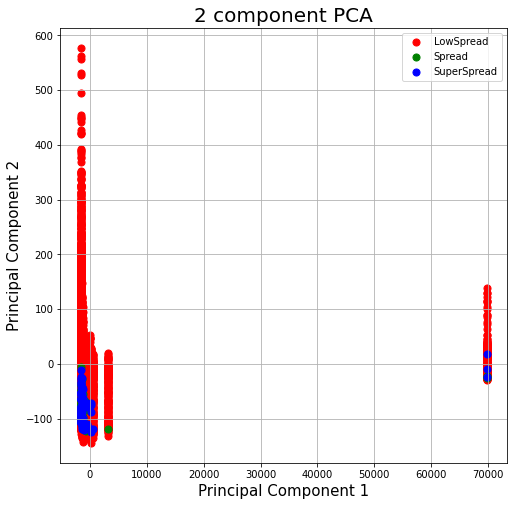

In [67]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['LowSpread', 'Spread', 'SuperSpread']
targets2 = np.unique(y_train)
colors = ['r', 'g', 'b']
for target, color in zip(targets2,colors):
    print(target)
    indicesToKeep = finalDf['label_code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [26]:
#obtain the eigenpairs of the Wine covariance matrix:
#data_cov = np.dot(np.transpose(data.values),data.values)
#data_cov
X_train_cov = np.cov(X_train_std.T)
w, v = np.linalg.eig(X_train_cov)

In [69]:
#The percent of variability contained within each component
w_percent = (w/np.sum(w))*100                 
print(w, '-> eigenvalues')
print(w_percent, ' -> percent of variability explained')

[4.94047277 1.45440325 1.10594134 0.88798726 0.73024216 0.54021503
 0.17359132 0.186166   0.23395742 0.41623041 0.33242218] -> eigenvalues
[44.90673796 13.21988985 10.05252337  8.07141602  6.63758207  4.9103185
  1.5778692   1.69216759  2.12657072  3.78335245  3.02157227]  -> percent of variability explained


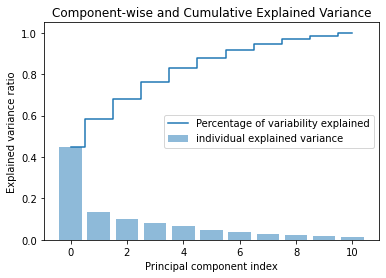

In [70]:
# calculate cumulative sum of explained variances
tot = sum(w)
var_exp = [(i / tot) for i in sorted(w, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.title("Component-wise and Cumulative Explained Variance")
plt.bar(range(0,11), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(0,11), cum_var_exp, where='mid',
         label='Percentage of variability explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [71]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(w[i]), v[:, i]) for i in range(len(w))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w2 = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W2:\n', w2)

Matrix W2:
 [[ 0.39978983 -0.05884997]
 [ 0.32059784 -0.04310409]
 [-0.02417421  0.22351982]
 [ 0.33832886 -0.2052277 ]
 [ 0.32958449 -0.35442123]
 [-0.34148284  0.28226578]
 [ 0.33553458  0.35030871]
 [ 0.35072823  0.23776764]
 [ 0.34862223  0.22736867]
 [-0.16982539  0.14800005]
 [ 0.10547974  0.66667882]]


In [72]:
X_train_pca = X_train_std.dot(w2)
print(X_train_pca)

[[-2.40209567 -1.5551451 ]
 [-0.29360447 -0.84097923]
 [-2.96635059 -1.92824807]
 ...
 [-1.40364883  1.31396318]
 [ 1.29539197  0.74987007]
 [ 1.59797032  0.513705  ]]


In [73]:
np.unique(y_train)
X_train_pca

array([[-2.40209567, -1.5551451 ],
       [-0.29360447, -0.84097923],
       [-2.96635059, -1.92824807],
       ...,
       [-1.40364883,  1.31396318],
       [ 1.29539197,  0.74987007],
       [ 1.59797032,  0.513705  ]])